<a href="https://colab.research.google.com/github/danpele/Stat_fin_markets/blob/master/SFM_Block_maxima_GEV/SFM_Block_maxima_GEV_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

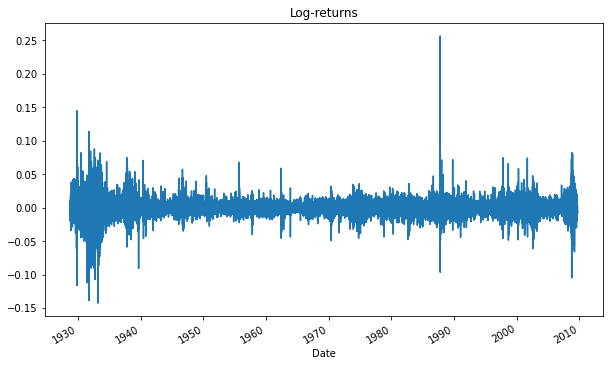

In [ ]:
#This program applies the Block Maxima method to annual losses of DJIA

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
from scipy import stats
from scipy.stats import kstest

#import quandl 
#df = quandl.get("BCB/UDJIAD1", start_date="1929-01-01", end_date="2018-12-31")

#read csv data
df=pd.read_csv('djia.csv', encoding='cp1252')
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index('Date')
df=df['Close']
df
log_returns = np.log(1 + df.pct_change())
log_returns.plot(figsize=(10, 6),legend = False, title='Log-returns');


In [ ]:
max_loss= -(log_returns.resample('Y').min())

max_loss

Date
1928-12-31    0.034372
1929-12-31    0.116396
1930-12-31    0.050086
1931-12-31    0.138635
1932-12-31    0.107640
                ...   
2005-12-31    0.020389
2006-12-31    0.019603
2007-12-31    0.025223
2008-12-31    0.105083
2009-12-31    0.066116
Freq: A-DEC, Name: Close, Length: 82, dtype: float64

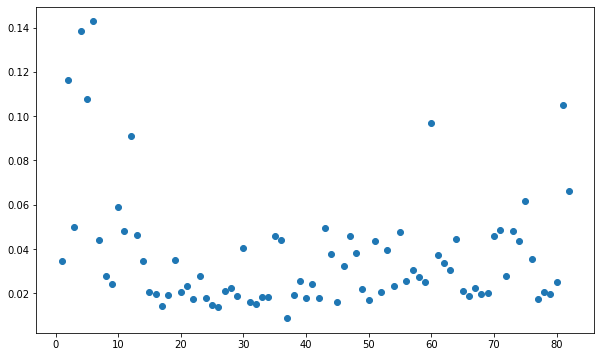

In [ ]:
max_loss=np.array(max_loss)

t = np.linspace(1,np.size(max_loss),np.size(max_loss))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, max_loss,"o")
plt.show()


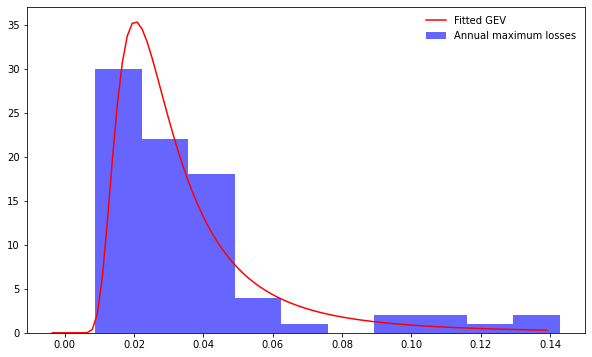

Shape
0.40667190875787523
Location
0.023894469622233076
Scale
0.011187379174286813


In [ ]:
fit= gev.fit(max_loss)

fig, ax = plt.subplots(figsize=(10, 6))
m=np.max(max_loss)
#plot the fit
shape, loc, scale = gev.fit(max_loss)
l = loc + scale / shape
x = np.linspace(l+0.00001, l+0.00001+m, num=100)
plt.plot(x, gev.pdf(x, *fit),color='r', label='Fitted GEV')
plt.hist(max_loss, alpha=0.6,color='blue', label='Annual maximum losses')
ax.legend(loc='best', frameon=False)
#x.plot(t, pdf)
plt.show()

print('Shape')
shape=-shape
print(shape)

print('Location')

print(loc)

print('Scale')

print(scale)


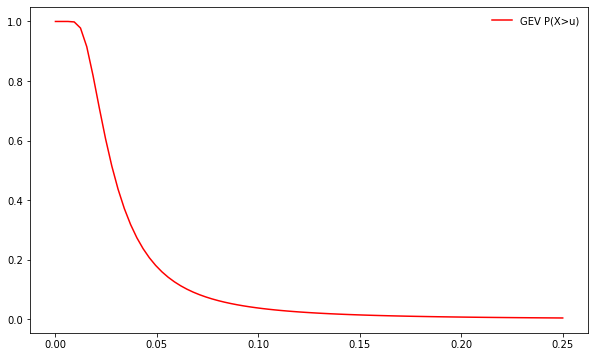

Probability of an annual maximum loss higher than 15 percent =0.014


In [ ]:



fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 0.25, num=len(max_loss))

prob=(1-gev.cdf(x,*fit))

plt.plot(x,prob,color='r', label='GEV P(X>u)')

ax.legend(loc='best', frameon=False)
plt.show()

prob=(1-gev.cdf(0.15,*fit))
print('Probability of an annual maximum loss higher than 15 percent =%.3f' %prob)


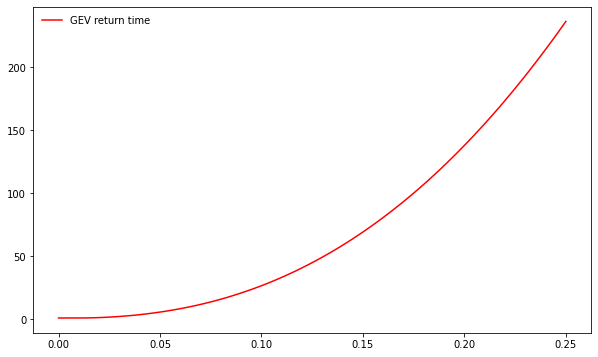

Return time (years) of an annual maximum loss higher than 10 percent =26.578


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 0.25, num=len(max_loss))

time=1/(1-gev.cdf(x,*fit))

plt.plot(x,time,color='r', label='GEV return time')

ax.legend(loc='best', frameon=False)
plt.show()



ret=1/(1-gev.cdf(0.10,*fit))
print('Return time (years) of an annual maximum loss higher than 10 percent =%.3f' %ret )